In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# 1. Measures of central tendency and spread (Page 41 - Section 2.1)

Let's see how you can calculate mean, median, sample standard deviation, and IQR. We will use the iris dataset.

In [3]:
from sklearn.datasets import load_iris
data = load_iris(as_frame=True)
iris_df = data.frame
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
feature_name = 'sepal width (cm)'

Text(0, 0.5, 'Count')

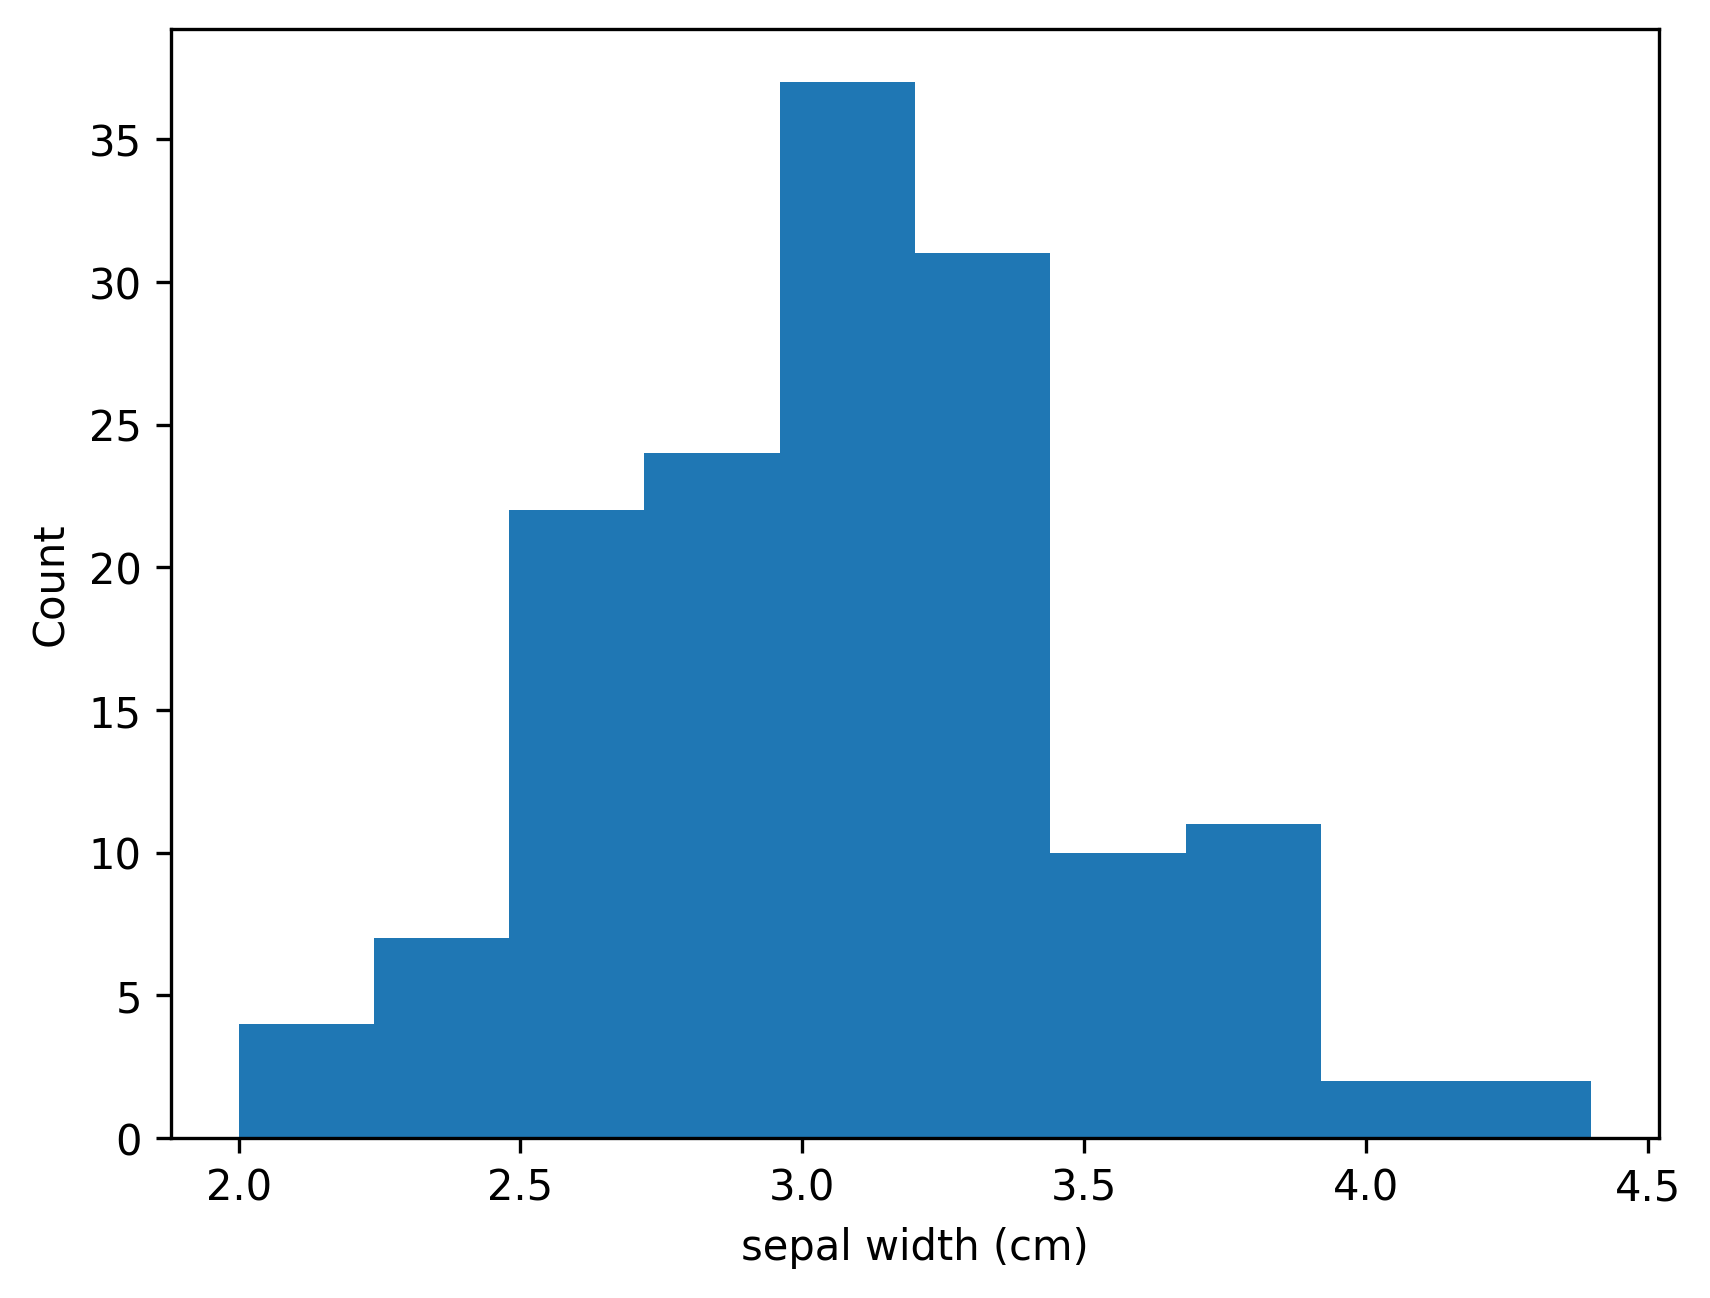

In [10]:
plt.figure(dpi=300)
plt.hist(iris_df[feature_name])
plt.xlabel(feature_name)
plt.ylabel('Count')

In [14]:
mean = np.mean(iris_df[feature_name])
median = np.median(iris_df[feature_name])
print(f'mean: {mean:.2f} cm')
print(f'median: {median:.2f} cm')

mean: 3.06 cm
median: 3.00 cm


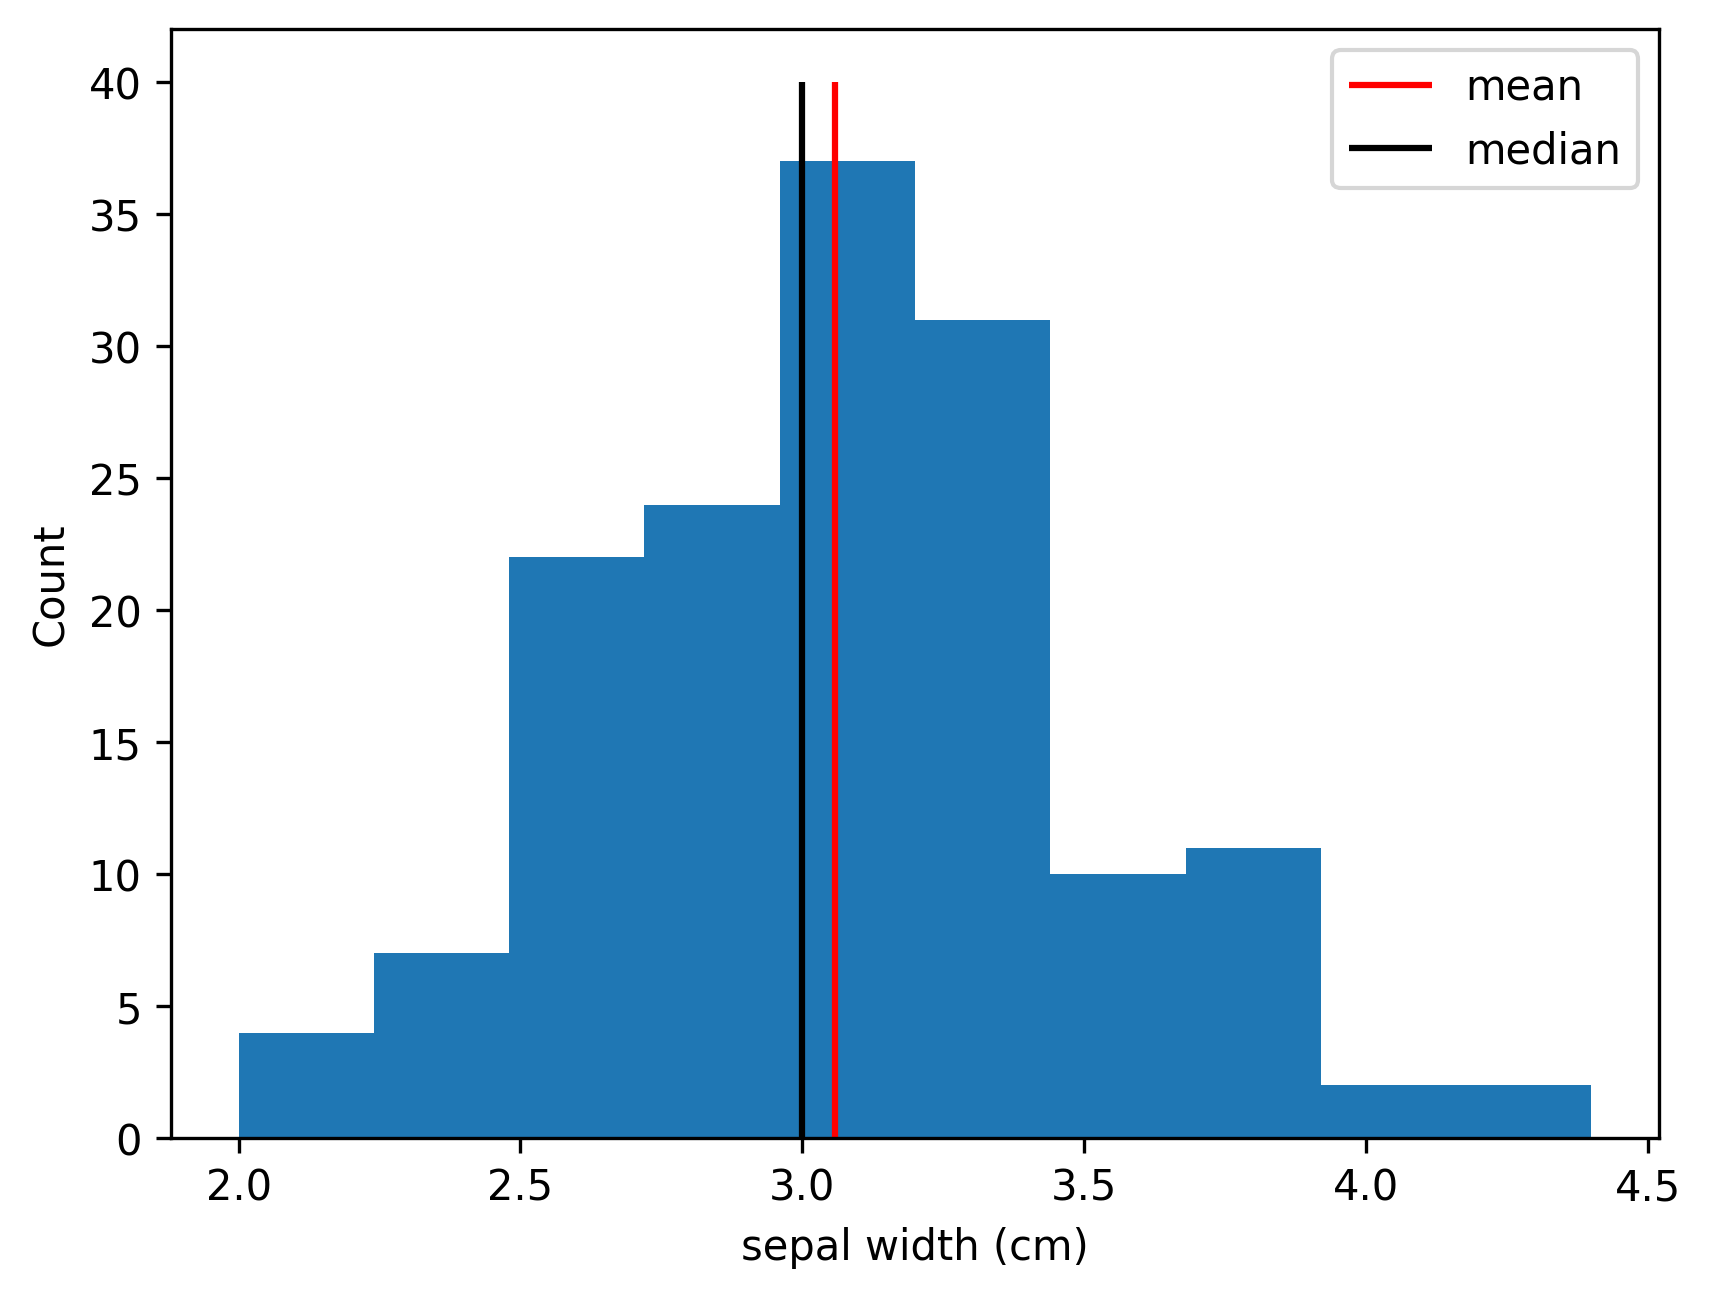

In [15]:
plt.figure(dpi=300)
plt.hist(iris_df[feature_name])
plt.xlabel(feature_name)
plt.ylabel('Count')
plt.vlines(x=mean, ymin=0, ymax=40, color='red', label='mean')
plt.vlines(x=median, ymin=0, ymax=40, color='black', label='median')
plt.legend()

Given that the mean is larger than the median, does this indicate a right or left skew in the distribution? When observing the distribution visually, does the observed skew match the expected skew based on the relationship between the mean and median?  

With a mean of 3.06 and a median of 3.0, the distribution is slightly right-skewed (positively skewed), because the mean is slightly larger than the median. The skew is likely subtle given the small difference.

To calculate the Interquartile Range (IQR), you can use `np.percentile()`. The IQR represents the range of the middle 50% of the data, specifically the values between the 25th percentile (Q1) and the 75th percentile (Q3):

In [16]:
q1 = np.percentile(iris_df[feature_name], 25)
q3 = np.percentile(iris_df[feature_name], 75)
iqr = q3 - q1
print(f'q1: {q1} cm')
print(f'q3: {q3} cm')
print(f'IQR: {iqr:.2f} cm')

q1: 2.8 cm
q3: 3.3 cm
IQR: 0.50 cm


In [17]:
print(f'The middle 50% of the data has {feature_name} values between {q1} and {q3} cm.')

The middle 50% of the data has sepal width (cm) values between 2.8 and 3.3 cm.


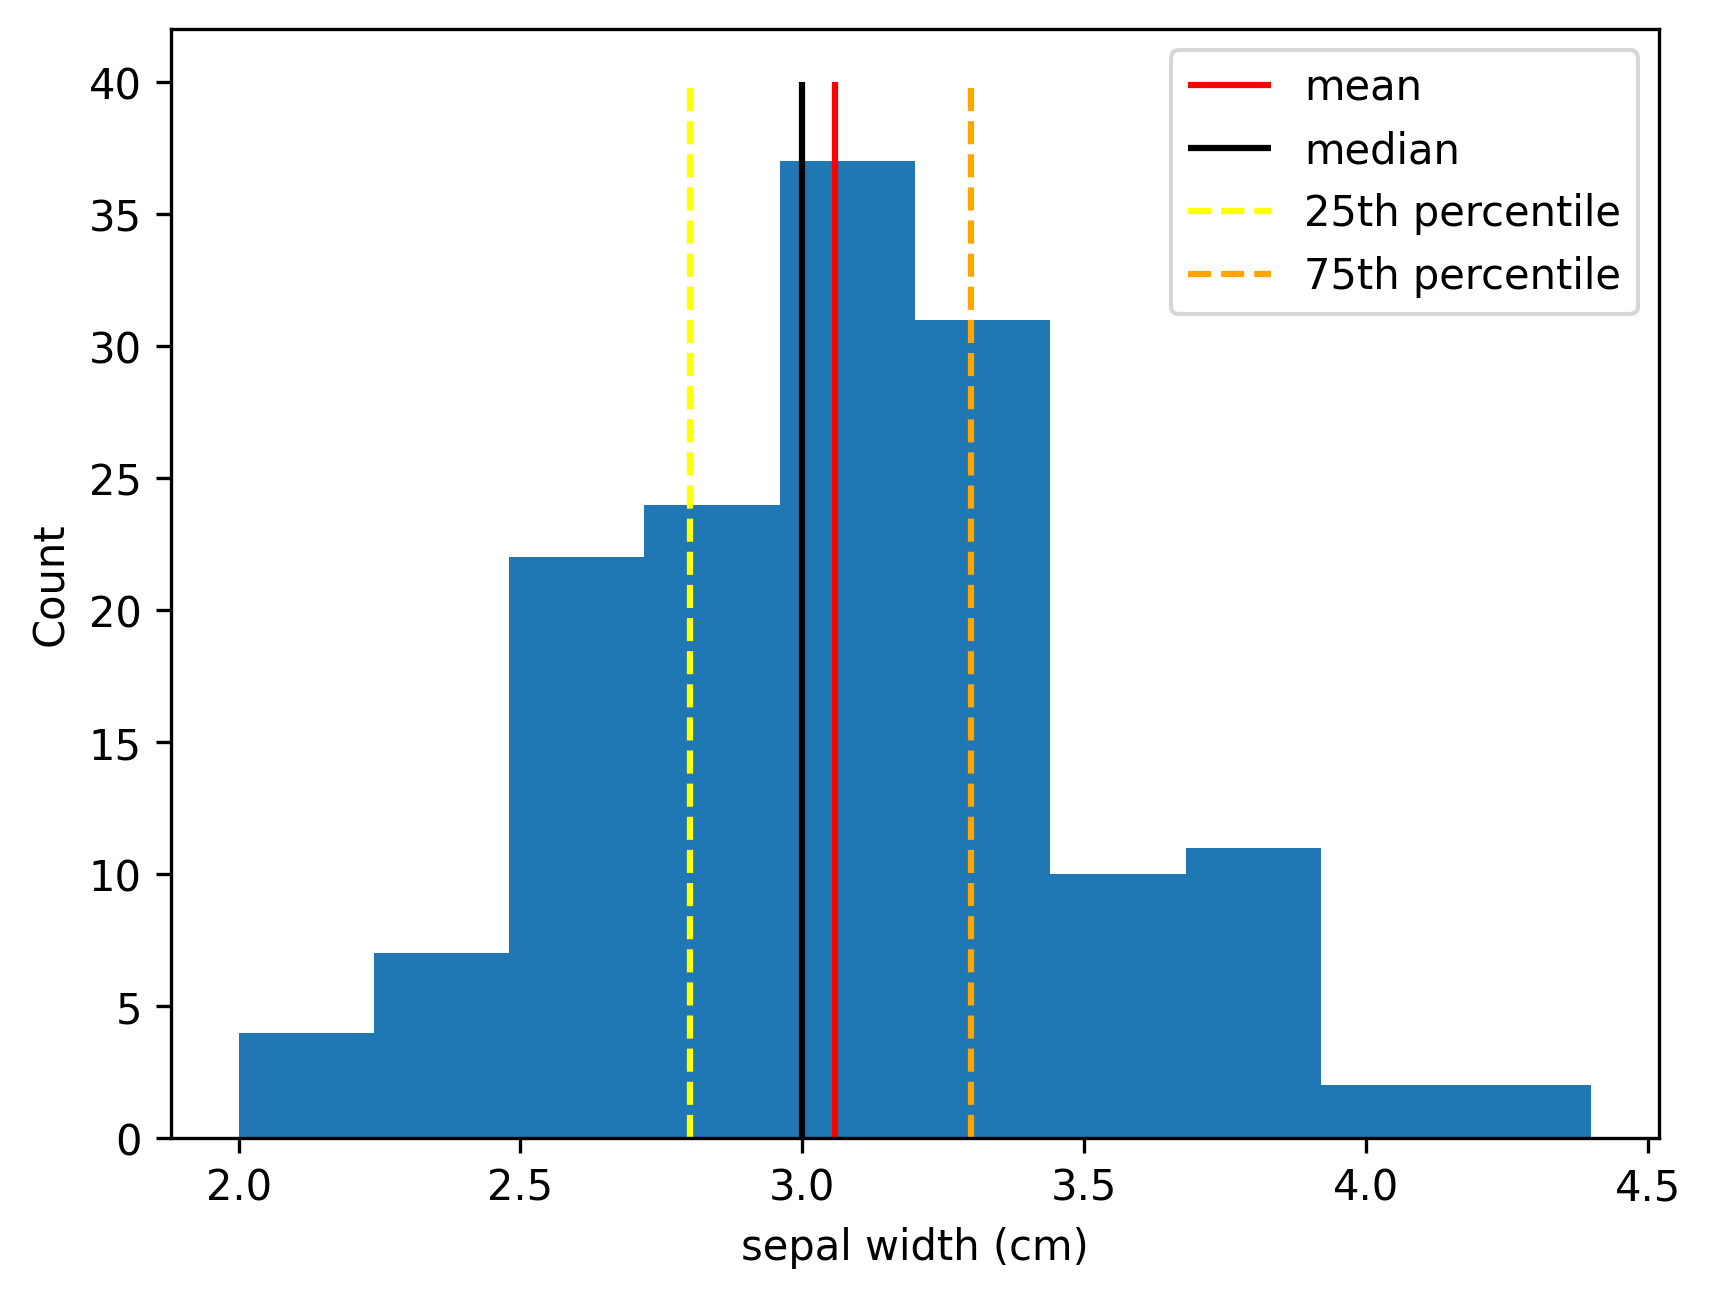

In [20]:
plt.figure(dpi=300)
plt.hist(iris_df[feature_name])
plt.xlabel(feature_name)
plt.ylabel('Count')
plt.vlines(x=mean, ymin=0, ymax=40, color='red', label='mean')
plt.vlines(x=median, ymin=0, ymax=40, color='black', label='median')
plt.vlines(x=q1, ymin=0, ymax=40, color='yellow', linestyle='--', label='25th percentile')
plt.vlines(x=q3, ymin=0, ymax=40, color='orange', linestyle='--', label='75th percentile')
plt.legend()

EXERCISE

Calculate and plot the interdecile range. Interdecile range is between 10% and 90%.

In [21]:
# YOUR CODE HERE
q1 = np.percentile(iris_df[feature_name], 10)
q3 = np.percentile(iris_df[feature_name], 90)
iqr = q3 - q1
print(f'q1: {q1} cm')
print(f'q3: {q3} cm')
print(f'IQR: {iqr:.2f} cm')

q1: 2.5 cm
q3: 3.6099999999999994 cm
IQR: 1.11 cm


In [22]:
print(f'The middle 50% of the data has {feature_name} values between {q1} and {q3} cm.')

The middle 50% of the data has sepal width (cm) values between 2.5 and 3.6099999999999994 cm.


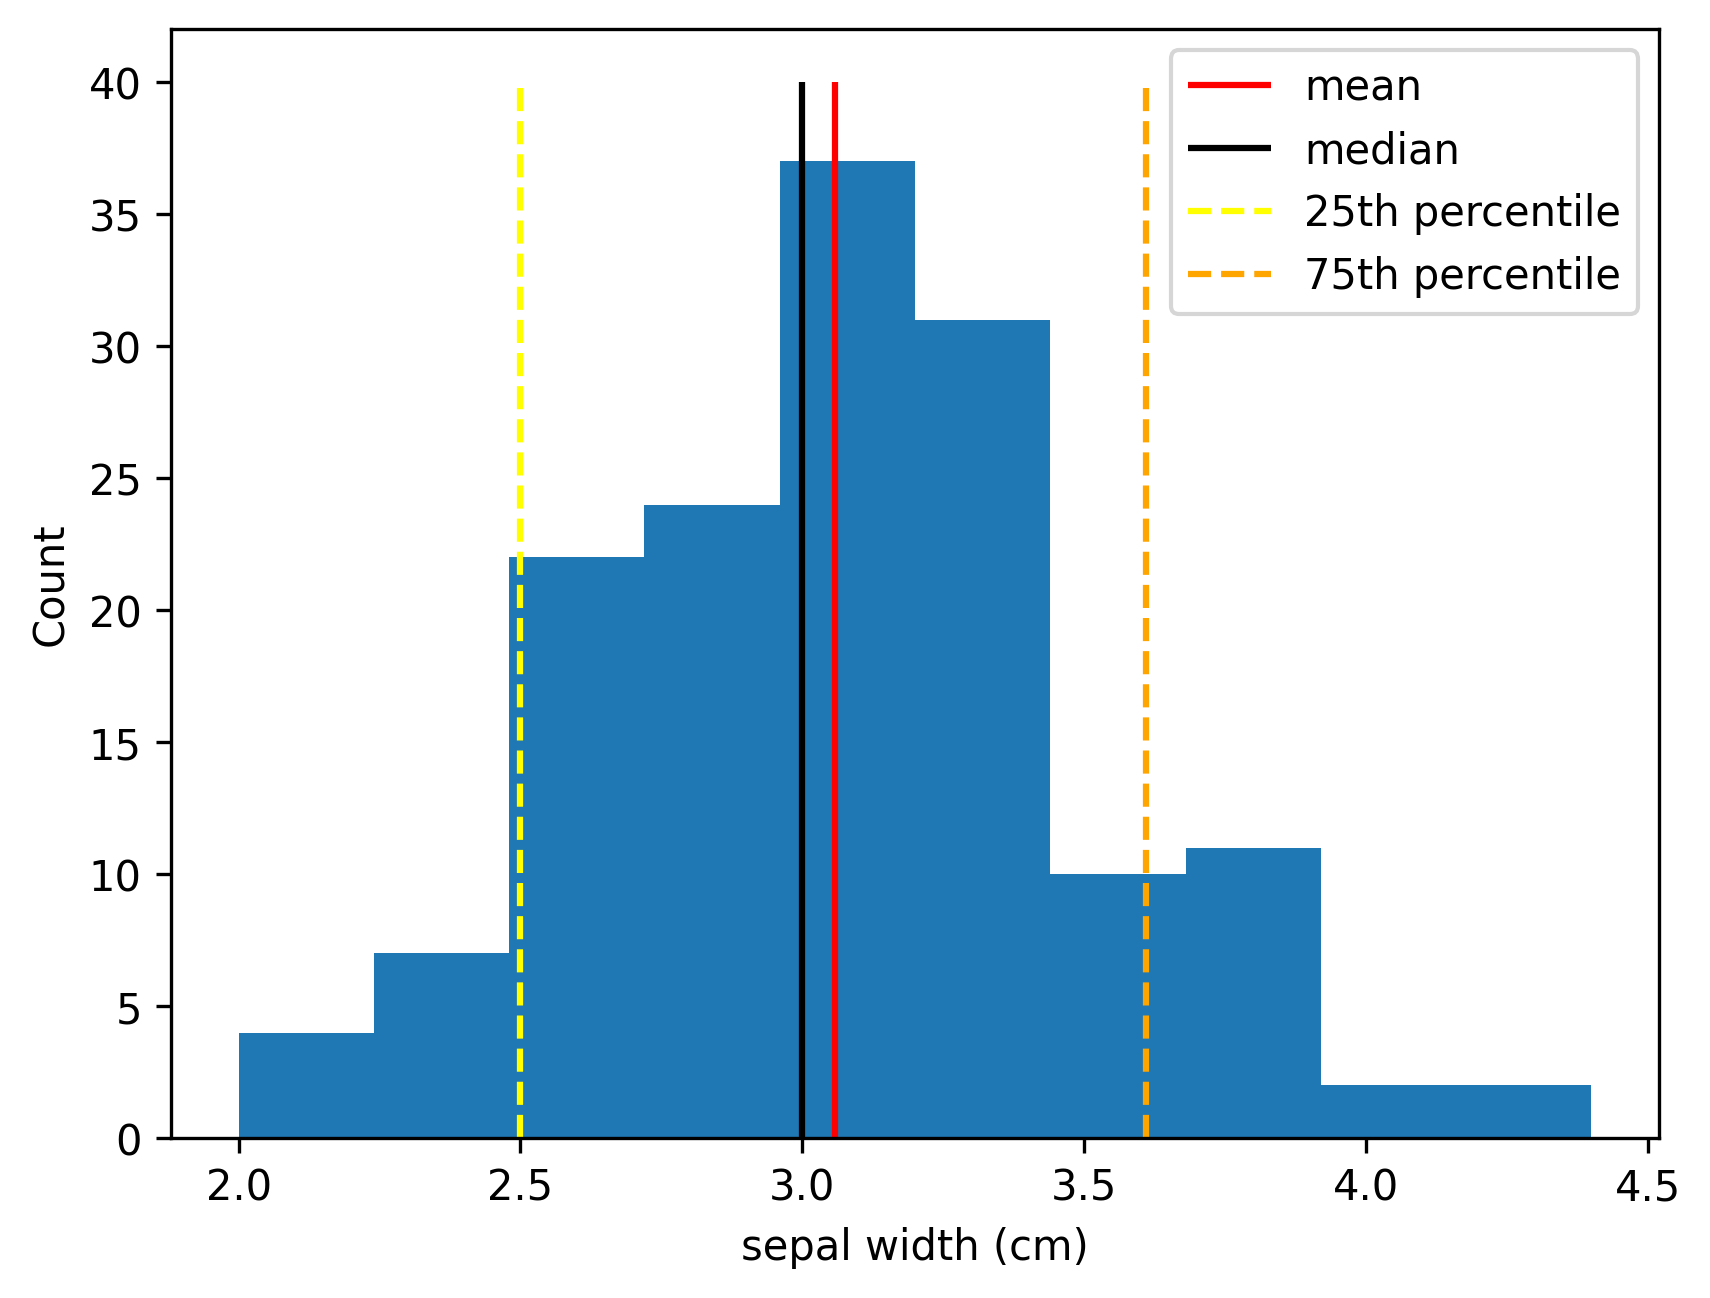

In [23]:
plt.figure(dpi=300)
plt.hist(iris_df[feature_name])
plt.xlabel(feature_name)
plt.ylabel('Count')
plt.vlines(x=mean, ymin=0, ymax=40, color='red', label='mean')
plt.vlines(x=median, ymin=0, ymax=40, color='black', label='median')
plt.vlines(x=q1, ymin=0, ymax=40, color='yellow', linestyle='--', label='25th percentile')
plt.vlines(x=q3, ymin=0, ymax=40, color='orange', linestyle='--', label='75th percentile')
plt.legend()

Now let's calculate the standard deviation.

In [26]:
std = np.std(iris_df[feature_name])
print(f'standard deviation: {std:.2f} cm')

standard deviation: 0.43 cm


Looks straight forward, but you need to be careful here.

If you check [documentation](https://numpy.org/doc/stable/reference/generated/numpy.std.html) you will see the following equation is used for the calculation:

$\sqrt{\frac{\sum_{i=1}^{N} (a_i - \bar{a})^2}{N}}$

but this is the population standard deviation. For sample standard deviation we need to divide by $n-1$ (see page 47, section 2.1.4 Variance and standard deviation)

In [27]:
n = len(iris_df[feature_name])
variance = std ** 2
corrected_variance = variance * n / (n - 1)
sample_std = np.sqrt(corrected_variance)
print(f'sample standard deviation: {sample_std:.2f} cm')

sample standard deviation: 0.44 cm


luckily, NumPy provides a way to do this by a parameter called delta degrees of freedom (`ddof`), with a default value of `0`.

$\sqrt{\frac{\sum_{i=1}^{N} (a_i - \bar{a})^2}{N - ddof}}$

if we set `ddof=1`, we should get the sample standard deviation.

In [28]:
sample_std = np.std(iris_df[feature_name], ddof=1)
print(f'standard deviation: {sample_std:.2f} cm')

standard deviation: 0.44 cm


# 2. Transforming data (Page 52 - Section 2.1.7)

In section 2.1.7, you have studied the concept of log transforms. Now, let's explore how this technique can be practically applied in machine learning, using a real-world dataset from materials science.

You have a collection of 20 different molecules, each described by five specific characteristics related to their structure (Ipc, BalabanJ, TPSA, FpDensityMorgan1, EState_VSA8). These features are numerical descriptions calculated using a chemistry toolkit called [RDKit](https://www.rdkit.org). The task is to predict a particular property of these molecules called the LUMO (Lowest Unoccupied Molecular Orbital), which is important for understanding their chemical behavior.

In [31]:
column_names = ['Ipc', 'BalabanJ', 'TPSA', 'FpDensityMorgan1', 'EState_VSA8', 'LUMO (eV)']

In [32]:
X = np.array([
    [1.577660e+09, 1.373882, 51.56, 0.526316, 73.138536],
    [6.008212e+13, 1.077704, 40.62, 0.500000, 75.539581],
    [1.716755e+08, 1.664091, 44.24,	0.742857, 29.894037],
    [1.296018e+11, 1.251070, 25.78,	0.510638, 123.384213],
    [1.071506e+08, 1.318155, 25.78,	0.676471, 74.850350],
    [2.601550e+09, 1.375896, 40.62,	0.500000, 0.000000],
    [3.354888e+01, 3.049648, 0.00, 1.666667, 22.870687],
    [7.607059e+21, 0.736446, 118.64, 0.333333, 128.186302],
    [4.071043e+17, 0.881154, 25.78, 0.306667, 220.446086],
    [1.223117e+14, 1.128004, 44.24,	0.433333, 109.536739],
    [5.122892e+08, 1.457012, 14.16,	0.783784, 103.189283],
    [3.208117e+12, 0.993858, 48.30,	0.629630, 90.028113],
    [3.296643e+09, 1.092688, 25.78,	0.525000, 86.986011],
    [1.100087e+11, 1.105169, 14.16,	0.617021, 127.454752],
    [1.315886e+11, 1.274059, 44.24,	0.595745, 79.224210],
    [4.673140e+10, 1.327031, 177.23, 0.617021, 12.138443],
    [1.189911e+14, 0.967426, 100.18, 0.555556, 89.319908],
    [5.376198e+06, 1.691173, 40.62,	0.678571, 12.132734],
    [3.079717e+12, 0.950112, 77.34,	0.433962, 87.605168],
    [3.456085e+06, 1.774879, 27.69,	0.851852, 28.959227]])

In [33]:
y = np.array(
    [-3.09, -3.23, -2.69, -2.85, -2.50,
     -3.23, -0.54, -3.01, -2.93, -2.52,
     -2.01, -2.74, -2.55, -2.33, -2.79,
     -3.91, -3.15, -2.77, -3.28, -1.84])

In [34]:
X.shape, y.shape

((20, 5), (20,))

In [35]:
molecular_df = pd.DataFrame(np.column_stack((X, y)), columns=column_names)
molecular_df.head(10)

,Ipc,BalabanJ,TPSA,FpDensityMorgan1,EState_VSA8,LUMO (eV)
0,1.577660e+09,1.373882,51.56,0.526316,73.138536,-3.09
1,6.008212e+13,1.077704,40.62,0.500000,75.539581,-3.23
2,1.716755e+08,1.664091,44.24,0.742857,29.894037,-2.69
3,1.296018e+11,1.251070,25.78,0.510638,123.384213,-2.85
4,1.071506e+08,1.318155,25.78,0.676471,74.850350,-2.50
5,2.601550e+09,1.375896,40.62,0.500000,0.000000,-3.23
6,3.354888e+01,3.049648,0.00,1.666667,22.870687,-0.54
7,7.607059e+21,0.736446,118.64,0.333333,128.186302,-3.01
8,4.071043e+17,0.881154,25.78,0.306667,220.446086,-2.93
9,1.223117e+14,1.128004,44.24,0.433333,109.536739,-2.52


Looking at the Ipc values, we can see that it has a very large range of values, which can cause issues in our regression model, such as making the model less stable or interpretable. We can check the [documentation](http://www.rdkit.org/new_docs/source/rdkit.Chem.GraphDescriptors.html#rdkit.Chem.GraphDescriptors.Ipc) to see what this feature is:

```python
rdkit.Chem.GraphDescriptors.Ipc(mol, avg=False, dMat=None, forceDMat=False)
    
    This returns the information content of the coefficients of the characteristic polynomial of the adjacency matrix of a hydrogen-suppressed graph of a molecule. ‘avg = True’ returns the information content divided by the total population. From Eq 6 of D. Bonchev & N. Trinajstic, J. Chem. Phys. vol 67, 4517-4533 (1977)
```


To address this, we can apply a logarithmic transformation to the Ipc feature. Let's train a linear regression models before and after applying log transformation.

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.2f} eV')

RMSE: 0.83 eV


(array([19.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([3.3548880e+01, 7.6070590e+20, 1.5214118e+21, 2.2821177e+21,
        3.0428236e+21, 3.8035295e+21, 4.5642354e+21, 5.3249413e+21,
        6.0856472e+21, 6.8463531e+21, 7.6070590e+21]),
 <BarContainer object of 10 artists>)

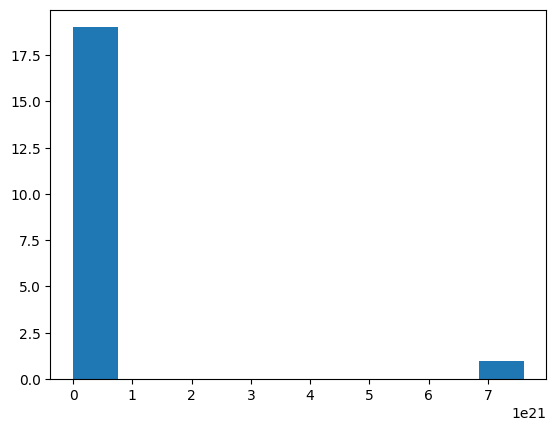

In [50]:
# Distribution of Ipc before the log transform
plt.hist(X[:, 0])

In [53]:
# Apply log transform to the Ipc feature
X[:, 0] = np.log1p(X[:, 0])

(array([1., 0., 0., 0., 0., 0., 4., 8., 5., 2.]),
 array([0.92165632, 0.98921335, 1.05677037, 1.12432739, 1.19188441,
        1.25944144, 1.32699846, 1.39455548, 1.4621125 , 1.52966952,
        1.59722655]),
 <BarContainer object of 10 artists>)

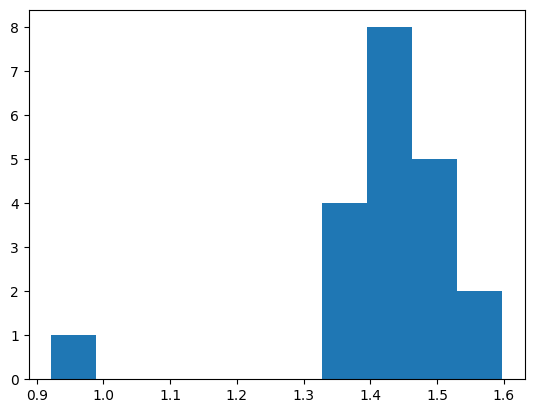

In [56]:
# Distribution after log transform
plt.hist(X[:, 0])

In [69]:
molecular_df = pd.DataFrame(np.column_stack((X, y)), columns=column_names)
molecular_df.head(10)

,Ipc,BalabanJ,TPSA,FpDensityMorgan1,EState_VSA8,LUMO (eV)
0,1.410781,1.373882,51.56,0.526316,73.138536,-3.09
1,1.501450,1.077704,40.62,0.500000,75.539581,-3.23
2,1.384740,1.664091,44.24,0.742857,29.894037,-2.69
3,1.454058,1.251070,25.78,0.510638,123.384213,-2.85
4,1.378738,1.318155,25.78,0.676471,74.850350,-2.50
5,1.416206,1.375896,40.62,0.500000,0.000000,-3.23
6,0.921656,3.049648,0.00,1.666667,22.870687,-0.54
7,1.597227,0.736446,118.64,0.333333,128.186302,-3.01
8,1.553258,0.881154,25.78,0.306667,220.446086,-2.93
9,1.506226,1.128004,44.24,0.433333,109.536739,-2.52


Ipc looks much better, let's try building our model again:

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.2f} eV')

RMSE: 0.38 eV


the error went down significantly!

# 3. Monte Carlo Simulations (Page 72 - Section 2.3.2)

In this section, we'll implement the simulations discussed in sections 2.3.2 and 2.3.3 using Python. These simulations, known as Monte Carlo simulations, are simple yet powerful. They have been used in many different fields such as physics, finance, medicine as well as machine learning.  For example, DeepMind used Monte Carlo simulations in AlphaGo: https://www.nature.com/articles/nature16961

Please read [Wikipedia article](https://en.wikipedia.org/wiki/Monte_Carlo_method) before moving forward.

The simulation is described in page 73:

"In this simulation, we take 20 notecards to represent the 20 patients, where we write down “infection” on 11 cards and “no infection” on 9 cards. In this hypothetical world, we believe each patient that got an infection was going to get it regardless of which group they were in, so let’s see what happens if we randomly assign the patients to the treatment and control groups again. We thoroughly shuffle the notecards and deal 14 into a vaccine pile and 6 into a placebo pile."

In [79]:
n_infected_patients = 11
n_non_infected_patients = 9

n_vaccinated_patients = 14
n_non_vaccinated_patients = 6

infected_patients = np.ones(n_infected_patients)
non_infected_patients = np.zeros(n_non_infected_patients)
all_patients = np.concatenate((infected_patients, non_infected_patients))
all_patients

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

Given the data above, simulate a single experiment and calculate the difference in infection rates between the placebo and treatment group.

The solution is available below, but please try yourself before checking the solution.

In [26]:
# YOUR CODE HERE

SOLUTION: Simulating a single trial

Step one is to assign 14 people to the treatment group. We can do this in two ways:

In [109]:
# Approach 1: np.random.choice()
vaccinated_patients = np.random.choice(all_patients, n_vaccinated_patients, replace=False)
vaccinated_patients

array([1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0.])

In [110]:
# Approach 2: np.random.shuffle()
# and take the first 14
np.random.shuffle(all_patients)
all_patients[:n_vaccinated_patients]

array([1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.])

let's do the simulation with the shuffling approach:

In [111]:
non_vaccinated_patients = all_patients[:6]
vaccinated_patients = all_patients[6:]

In [114]:
vaccinated_patients

array([0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1.])

In [115]:
non_vaccinated_patients

array([1., 1., 0., 1., 0., 1.])

In [118]:
np.random.shuffle(all_patients)
vaccinated_patients = all_patients[:n_vaccinated_patients]
non_vaccinated_patients = all_patients[n_vaccinated_patients:]

now calculate the infection ratio in each group:

In [127]:
proportion_of_patients_infected_in_the_vaccination_group = np.sum(vaccinated_patients)/n_vaccinated_patients
proportion_of_patients_infected_in_the_vaccination_group

0.6428571428571429

In [128]:
# We know that the remaining patients should be in the placebo group so:
proportion_of_patients_infected_in_the_non_vaccination_group = np.sum(non_vaccinated_patients)/n_non_vaccinated_patients
proportion_of_patients_infected_in_the_non_vaccination_group

0.3333333333333333

In [140]:
# infection rate difference between the placebo group and the treatment group
dif = proportion_of_patients_infected_in_the_non_vaccination_group - proportion_of_patients_infected_in_the_vaccination_group
dif

-0.3095238095238096

Now run the simulation for 100 times, and plot a histogram (Figure 2.31), and answer the question in EXAMPLE 2.35 based on your simulation. Your are not going to get the exact same answer but somewhere close.

In [141]:
n_trials = 100

In [37]:
# YOUR CODE HERE

SOLUTION: Simulating 100 trials

In [150]:
differences = []
for trial in range(n_trials):
    np.random.shuffle(all_patients)
    vaccinated_patients = all_patients[:n_vaccinated_patients]
    non_vaccinated_patients = all_patients[n_vaccinated_patients:]
    
    proportion_of_patients_infected_in_the_vaccination_group = np.sum(vaccinated_patients)/n_vaccinated_patients
    proportion_of_patients_infected_in_the_non_vaccination_group = np.sum(non_vaccinated_patients)/n_non_vaccinated_patients
    
    dif = proportion_of_patients_infected_in_the_non_vaccination_group - proportion_of_patients_infected_in_the_vaccination_group

    differences.append(dif)

differences = np.array(differences)

(array([ 8.,  0., 15.,  0.,  0., 37.,  0., 30.,  0., 10.]),
 array([-0.54761905, -0.45238095, -0.35714286, -0.26190476, -0.16666667,
        -0.07142857,  0.02380952,  0.11904762,  0.21428571,  0.30952381,
         0.4047619 ]),
 <BarContainer object of 10 artists>)

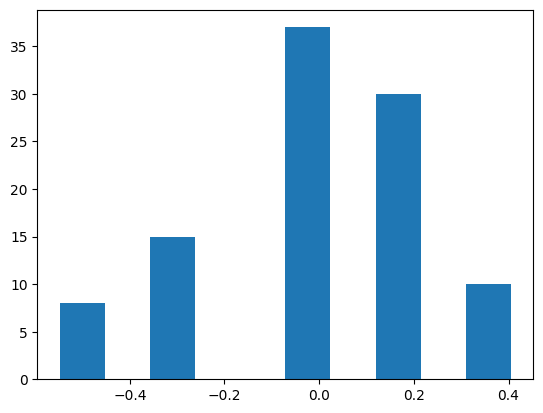

In [151]:
plt.hist(differences)

Note in the textbook the ratio is noted as 0.643, however this value is rounded. If you calculate it yourself it is: 0.6428571428571428. Since this value is the highest possible value (all patients in the placebo got infected, 100% infection), if you use 0.643 you will get zero.

In [154]:
# Correct
100 * np.sum(differences >= 0.642857) / n_trials

0.0

In [158]:
# Not correct
100 * np.sum(differences >= 0.643) / n_trials

0.0

In exercise 2.35, the answer provided is 2%, but my simulation result was 1%. Is this an error? Given that we only ran 100 trials, some fluctuation in the results is expected, so we cannot immediately conclude that there is a mistake in the simulation. If we repeat the simulation, we may obtain different results due to variability in random sampling.

To get a more accurate estimate, it's best to increase the number of trials, for example, to 1,000,000:

In [162]:
n_trials = 1000000
differences = []
for trial in range(n_trials):
    np.random.shuffle(all_patients)
    vaccinated_patients = all_patients[:n_vaccinated_patients]
    non_vaccinated_patients = all_patients[n_vaccinated_patients:]
    
    proportion_of_patients_infected_in_the_vaccination_group = np.sum(vaccinated_patients)/n_vaccinated_patients
    proportion_of_patients_infected_in_the_non_vaccination_group = np.sum(non_vaccinated_patients)/n_non_vaccinated_patients
    
    dif = proportion_of_patients_infected_in_the_non_vaccination_group - proportion_of_patients_infected_in_the_vaccination_group

    differences.append(dif)

differences = np.array(differences)

# Correct
100 * np.sum(differences >= 0.642857) / n_trials

1.203

After increasing the number of trials, we obtained a result of 1.2%. This estimate is more reliable than both initial estimates (1% or 2%) because a larger number of trials reduces the impact of random fluctuations, leading to a more precise estimate.

Note that your results and mine may vary because we haven't fixed the random seed, and different versions of NumPy can produce different random numbers.